# 크기의 영향
여러개의 $\beta$ 를 이용해서 크기의 영향을 파악한다.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def neighbor(L, N):
    neighbor_point = []

    x = N % L
    y = N // L

    if x == 0:
        temp_x = x + L - 1
        temp_y = y
        neighbor_point.append([temp_x, y])
    else:
        neighbor_point.append([x - 1, y])

    if x == L - 1:
        temp_x = x - L + 1
        temp_y = y
        neighbor_point.append([temp_x, y])
    else:
        neighbor_point.append([x + 1, y])

    if y == 0:
        temp_x = x
        temp_y = (L - 1)
        neighbor_point.append([x, temp_y])
    else:
        neighbor_point.append([x, y - 1])

    if y == L - 1:
        temp_x = x
        temp_y = 0
        neighbor_point.append([x, temp_y])
    else:
        neighbor_point.append([x, y + 1])

    return neighbor_point

def energy(L, A) : #L : 행의 갯수, A: 행렬 이름
    E = 0
    for i in range(L ** 2) :
        target_x = i % L
        target_y = i // L

        for i in neighbor(L, i) :
            if A[target_x][target_y] == A[i[0]][i[1]] :
                E -= 1
            else :
                E += 1
    E = E/2
    # print(E) # double count 문제 해결하기 위해 "/2"함
    return E

# BETA 간격을 0.1 ~ 1로 조정함 (0.4~0.6은 자세히 확인)

In [12]:
def spin_L(temp_L):
#     fig, ax = plt.subplots(1, 2, figsize=(18, 5))

    L = temp_L
    n = 1000
    beta_1, beta_2, beta_3 = list(np.arange(0.1, 0.4, 0.2)), list(np.arange(0.4, 0.6, 0.01)), list(np.arange(0.6, 1.1, 0.2))
    beta = beta_1 + beta_2 + beta_3
    # print('베타 갯수 : ', len(beta))

    S = np.random.randint(0, 2, (L, L)) * 2 - 1
    S[0][0] = +1

    avg_spin_by_beta_list = []
    entire_spin_by_beta_list = []
    for temp_beta in beta:
        temp_spin_by_beta = 0
        for _ in range(n):
            U = S.copy()
            random_row = np.random.randint(0, L)
            random_col = np.random.randint(0, L)
            U[random_row, random_col] *= -1  # 스핀을 뒤집음

            temp_sum = 0
            for i,j in neighbor(L, random_row * L + random_col) :
                temp_sum += S[i][j]
            delta_E = 2 * S[random_row][random_col] * temp_sum

            if delta_E <= 0 or np.random.random() < np.exp(-temp_beta * delta_E):
                S = U
            temp_spin_by_beta += abs(np.sum(S)) / (L ** 2)
            entire_spin_by_beta_list.append(abs(np.sum(S)) / (L ** 2))

        avg_spin_by_beta = temp_spin_by_beta / n
        avg_spin_by_beta_list.append(avg_spin_by_beta)
    # print('베타별로 스핀값의 평균 :', avg_spin_by_beta_list)
    # print('베타별로 스핀값의 평균 갯수 : ', len(avg_spin_by_beta_list))

    # print('전체 spin값 : ', entire_spin_by_beta_list)
    # print('전체 spin값 갯수 : ', len(entire_spin_by_beta_list))

    # ax[0].plot(beta, avg_spin_by_beta_list)
    # ax[0].set_title('x = beta, y = avg_spin_by_beta_list')

    tau_list = []
    for i in range(len(beta)):
        start = 0 + i * n
        end = 999 + i * n
        # print(' -------------', start, end, ' -------------')
        t_spin_by_beta = entire_spin_by_beta_list[start:end]
        # print(t_spin_by_beta)
        A = pd.Series(t_spin_by_beta)
        tau = 0
        for k in range(1, 100):
            autocorr_value = A.autocorr(lag=k)
            # print(autocorr_value)
            if not np.isnan(autocorr_value):
                tau += autocorr_value
        tau_list.append(tau)

    # print(tau_list)

    spin_err = []
    spin_avg = []
    for i in range(len(beta)):
        start = 0 + i * n
        end = 999 + i * n
        spin_by_beta = entire_spin_by_beta_list[start+200:end]
        spin_avg.append(np.mean(spin_by_beta))

        tau = round(tau_list[i-1]) * 3
        new_spin = spin_by_beta[::tau]
        temp_err = np.std(new_spin) / np.sqrt(len(new_spin) -1)
        spin_err.append(temp_err)

    # ax[1].errorbar(beta, spin_avg, yerr=spin_err)
    # ax[1].set_title('x = beta, y = avg_spin_by_beta_list + error')

    return beta, avg_spin_by_beta_list, spin_err, spin_avg

0 Error occurred: slice step cannot be zero
1 Error occurred: slice step cannot be zero
2 Error occurred: slice step cannot be zero
3 Error occurred: slice step cannot be zero


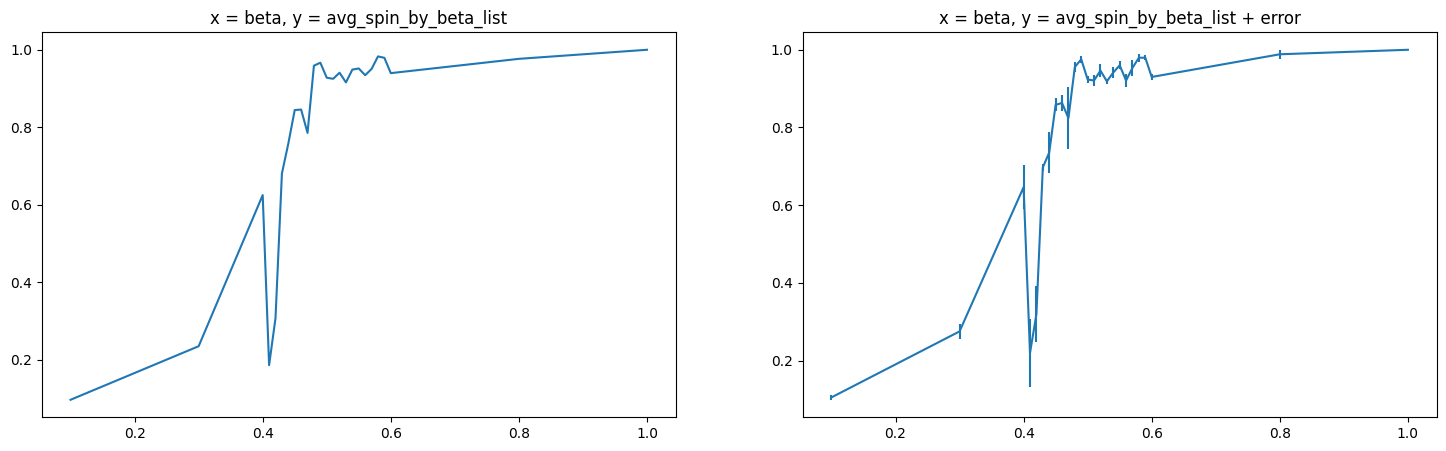

In [13]:
for i in range(100):
    try:
        beta, L1_avg_spin_by_beta_list, L1_spin_err, L1_spin_avg = spin_L(10)
        fig,ax = plt.subplots(1, 2, figsize=(18, 5))
        ax[0].plot(beta, L1_avg_spin_by_beta_list)
        ax[0].set_title('x = beta, y = avg_spin_by_beta_list')
        ax[1].errorbar(beta, L1_spin_avg, yerr = L1_spin_err)
        ax[1].set_title('x = beta, y = avg_spin_by_beta_list + error')
        break
    except Exception as e:
        print(i, f"Error occurred: {e}")
        continue

0 Error occurred: slice step cannot be zero
1 Error occurred: slice step cannot be zero
2 Error occurred: slice step cannot be zero
3 Error occurred: slice step cannot be zero
4 Error occurred: slice step cannot be zero


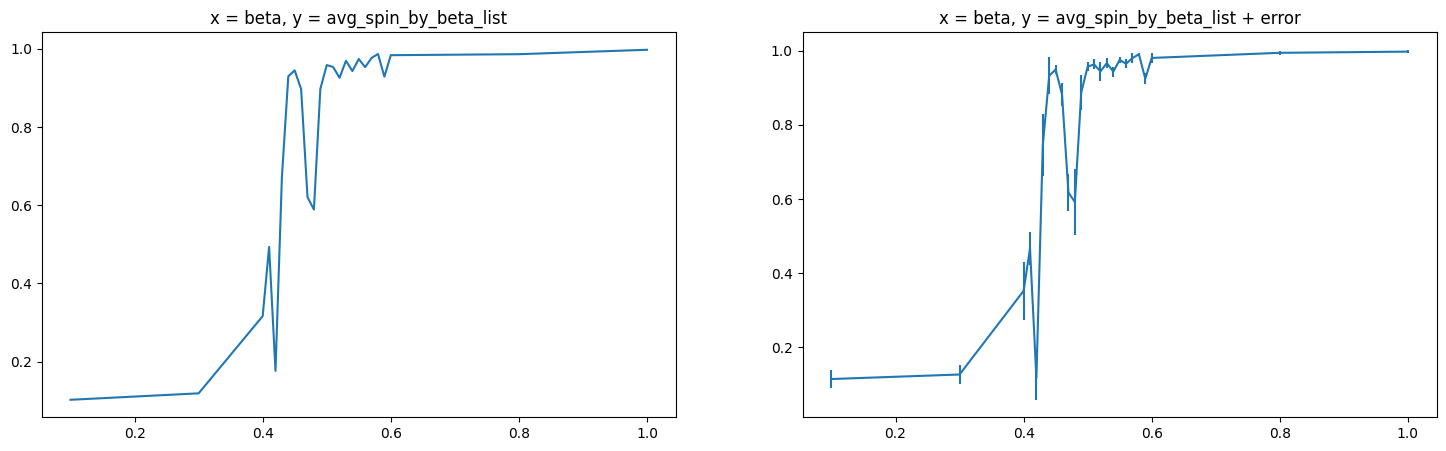

In [14]:
for i in range(100):
    try:
        beta, L2_avg_spin_by_beta_list, L2_spin_err, L2_spin_avg = spin_L(10)
        fig,ax = plt.subplots(1, 2, figsize=(18, 5))
        ax[0].plot(beta, L2_avg_spin_by_beta_list)
        ax[0].set_title('x = beta, y = avg_spin_by_beta_list')
        ax[1].errorbar(beta, L2_spin_avg, yerr = L2_spin_err)
        ax[1].set_title('x = beta, y = avg_spin_by_beta_list + error')
        break
    except Exception as e:
        print(i, f"Error occurred: {e}")
        continue

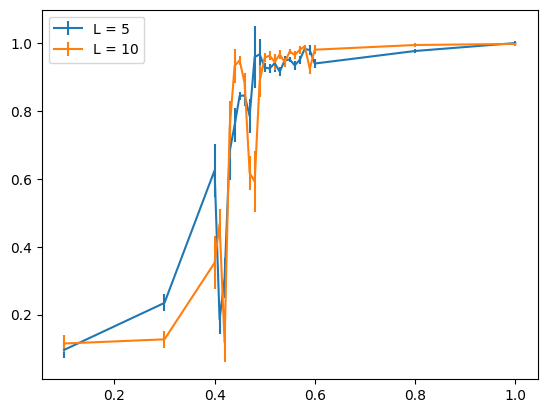

In [16]:
plt.errorbar(beta, L1_avg_spin_by_beta_list, yerr = L2_spin_err, label = 'L = 5')
plt.errorbar(beta, L2_spin_avg, yerr = L2_spin_err, label = 'L = 10')
plt.legend()
plt.show()

# BETA 간격을 0.35~0.7로 조정함

In [8]:
def spin_L(temp_L):
#     fig, ax = plt.subplots(1, 2, figsize=(18, 5))

    L = temp_L
    n = 1000
    # beta_1, beta_2, beta_3 = list(np.arange(0.1, 0.4, 0.2)), list(np.arange(0.4, 0.6, 0.01)), list(np.arange(0.6, 1.1, 0.2))
    # beta = beta_1 + beta_2 + beta_3
    beta = list(np.arange(0.35, 0.7, 0.01))
    # print('베타 갯수 : ', len(beta))

    S = np.random.randint(0, 2, (L, L)) * 2 - 1
    S[0][0] = +1

    avg_spin_by_beta_list = []
    entire_spin_by_beta_list = []
    for temp_beta in beta:
        temp_spin_by_beta = 0
        for _ in range(n):
            U = S.copy()
            random_row = np.random.randint(0, L)
            random_col = np.random.randint(0, L)
            U[random_row, random_col] *= -1  # 스핀을 뒤집음

            temp_sum = 0
            for i,j in neighbor(L, random_row * L + random_col) :
                temp_sum += S[i][j]
            delta_E = 2 * S[random_row][random_col] * temp_sum

            if delta_E <= 0 or np.random.random() < np.exp(-temp_beta * delta_E):
                S = U
            temp_spin_by_beta += abs(np.sum(S)) / (L ** 2)
            entire_spin_by_beta_list.append(abs(np.sum(S)) / (L ** 2))

        avg_spin_by_beta = temp_spin_by_beta / n
        avg_spin_by_beta_list.append(avg_spin_by_beta)
    # print('베타별로 스핀값의 평균 :', avg_spin_by_beta_list)
    # print('베타별로 스핀값의 평균 갯수 : ', len(avg_spin_by_beta_list))

    # print('전체 spin값 : ', entire_spin_by_beta_list)
    # print('전체 spin값 갯수 : ', len(entire_spin_by_beta_list))

    # ax[0].plot(beta, avg_spin_by_beta_list)
    # ax[0].set_title('x = beta, y = avg_spin_by_beta_list')

    tau_list = []
    for i in range(len(beta)):
        start = 0 + i * n
        end = 999 + i * n
        # print(' -------------', start, end, ' -------------')
        t_spin_by_beta = entire_spin_by_beta_list[start:end]
        # print(t_spin_by_beta)
        A = pd.Series(t_spin_by_beta)
        tau = 0
        for k in range(1, 100):
            autocorr_value = A.autocorr(lag=k)
            # print(autocorr_value)
            if not np.isnan(autocorr_value):
                tau += autocorr_value
        tau_list.append(tau)

    # print(tau_list)

    spin_err = []
    spin_avg = []
    for i in range(len(beta)):
        start = 0 + i * n
        end = 999 + i * n
        spin_by_beta = entire_spin_by_beta_list[start+200:end]
        spin_avg.append(np.mean(spin_by_beta))

        tau = round(tau_list[i-1]) * 3
        new_spin = spin_by_beta[::tau]
        temp_err = np.std(new_spin) / np.sqrt(len(new_spin) -1)
        spin_err.append(temp_err)

    # ax[1].errorbar(beta, spin_avg, yerr=spin_err)
    # ax[1].set_title('x = beta, y = avg_spin_by_beta_list + error')

    return beta, avg_spin_by_beta_list, spin_err, spin_avg

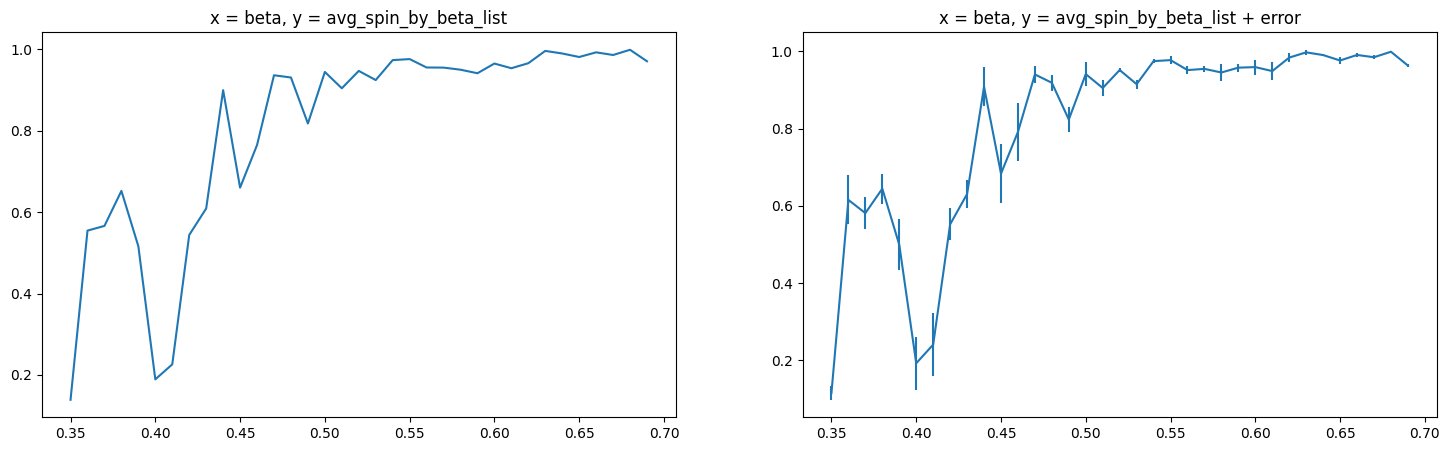

In [9]:
for i in range(100):
    try:
        beta, L1_avg_spin_by_beta_list, L1_spin_err, L1_spin_avg = spin_L(10)
        fig,ax = plt.subplots(1, 2, figsize=(18, 5))
        ax[0].plot(beta, L1_avg_spin_by_beta_list)
        ax[0].set_title('x = beta, y = avg_spin_by_beta_list')
        ax[1].errorbar(beta, L1_spin_avg, yerr = L1_spin_err)
        ax[1].set_title('x = beta, y = avg_spin_by_beta_list + error')
        break
    except Exception as e:
        print(i, f"Error occurred: {e}")
        continue

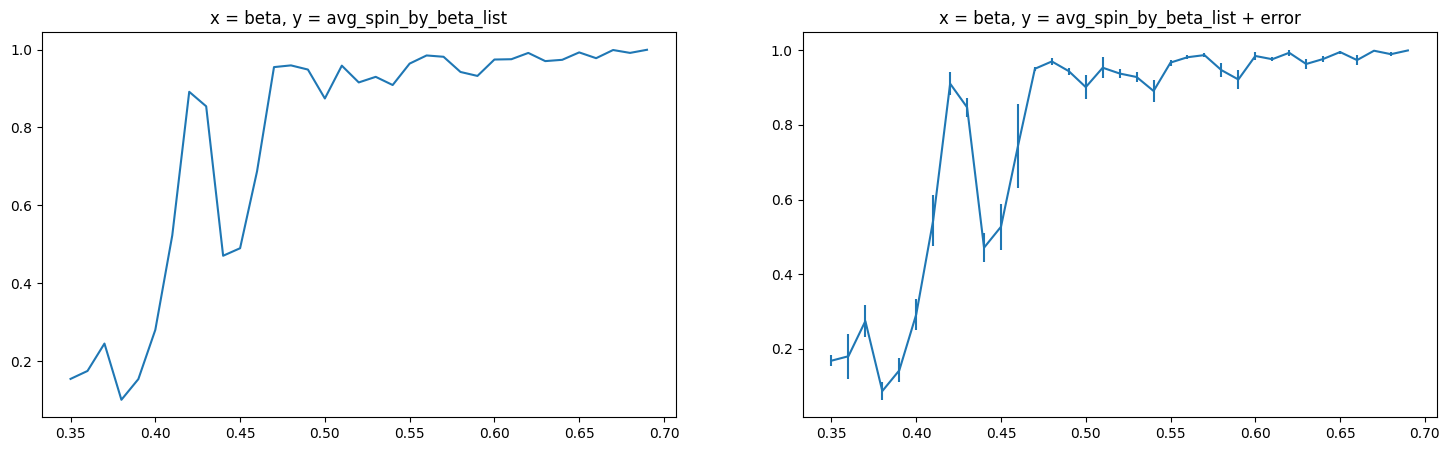

In [10]:
for i in range(100):
    try:
        beta, L2_avg_spin_by_beta_list, L2_spin_err, L2_spin_avg = spin_L(10)
        fig,ax = plt.subplots(1, 2, figsize=(18, 5))
        ax[0].plot(beta, L2_avg_spin_by_beta_list)
        ax[0].set_title('x = beta, y = avg_spin_by_beta_list')
        ax[1].errorbar(beta, L2_spin_avg, yerr = L2_spin_err)
        ax[1].set_title('x = beta, y = avg_spin_by_beta_list + error')
        break
    except Exception as e:
        print(i, f"Error occurred: {e}")
        continue

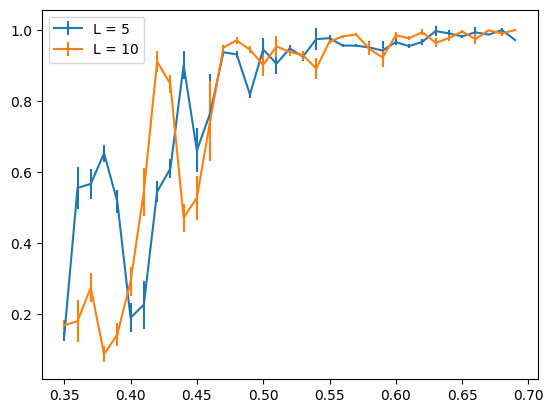

In [11]:
plt.errorbar(beta, L1_avg_spin_by_beta_list, yerr = L2_spin_err, label = 'L = 5')
plt.errorbar(beta, L2_spin_avg, yerr = L2_spin_err, label = 'L = 10')
plt.legend()
plt.show()